In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd

In [3]:
bli_df = pd.read_csv("/media/girish/HDD/code_repos/bitbucket/repos/machine_learning/hands_on_ml_book/1_intro/better_life_index_2015.csv")
bli_df.head()

LOCATION         Country INDICATOR                           Indicator  \
0      AUS       Australia   HO_BASE  Dwellings without basic facilities   
1      AUT         Austria   HO_BASE  Dwellings without basic facilities   
2      BEL         Belgium   HO_BASE  Dwellings without basic facilities   
3      CAN          Canada   HO_BASE  Dwellings without basic facilities   
4      CZE  Czech Republic   HO_BASE  Dwellings without basic facilities   

  MEASURE Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0       L   Value        TOT      Total        PC  Percentage               0   
1       L   Value        TOT      Total        PC  Percentage               0   
2       L   Value        TOT      Total        PC  Percentage               0   
3       L   Value        TOT      Total        PC  Percentage               0   
4       L   Value        TOT      Total        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Value Flag Codes  \
0     units                    NaN               NaN    1.1          E   
1     units                    NaN               NaN    1.0        NaN   
2     units                    NaN               NaN    2.0        NaN   
3     units                    NaN               NaN    0.2        NaN   
4     units                    NaN               NaN    0.9        NaN   

             Flags  
0  Estimated value  
1              NaN  
2              NaN  
3              NaN  
4              NaN

In [4]:
bli_ls_df = bli_df.loc[(bli_df.INDICATOR == "SW_LIFS") & (bli_df.INEQUALITY == "TOT")].sort_values(by=["Value"])
bli_ls_df.shape

(37, 17)

In [5]:
bli_ls_df.Country.nunique()

37

In [6]:
gdp_df = pd.read_csv("/media/girish/HDD/code_repos/bitbucket/repos/machine_learning/hands_on_ml_book/1_intro/gdp_per_capita.csv", sep="\t").rename(columns={"2015": "GDP"})

gdp_df.head()

Country                                 Subject Descriptor  \
0          Afghanistan  Gross domestic product per capita, current prices   
1              Albania  Gross domestic product per capita, current prices   
2              Algeria  Gross domestic product per capita, current prices   
3               Angola  Gross domestic product per capita, current prices   
4  Antigua and Barbuda  Gross domestic product per capita, current prices   

          Units  Scale                      Country/Series-specific Notes  \
0  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
1  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
2  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
3  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
4  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   

          GDP  Estimates Start After  
0     599.994                 2013.0  
1   3,995.383                 2010.0  
2   4,318.135                 2014.0  
3   4,100.315                 2014.0  
4  14,414.302                 2011.0

In [8]:
gdp_df.Country.nunique()

189

In [24]:
df = bli_ls_df.merge(gdp_df, how="inner", on="Country", validate="1:1")
df.columns

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', 'GDP', 'Estimates Start After'],
      dtype='object')

In [25]:
df.rename(columns={"Value": "LifeSatisfaction"}, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LOCATION                       36 non-null     object 
 1   Country                        36 non-null     object 
 2   INDICATOR                      36 non-null     object 
 3   Indicator                      36 non-null     object 
 4   MEASURE                        36 non-null     object 
 5   Measure                        36 non-null     object 
 6   INEQUALITY                     36 non-null     object 
 7   Inequality                     36 non-null     object 
 8   Unit Code                      36 non-null     object 
 9   Unit                           36 non-null     object 
 10  PowerCode Code                 36 non-null     int64  
 11  PowerCode                      36 non-null     object 
 12  Reference Period Code          0 non-null      float

In [30]:
df = df[["Country", "GDP", "LifeSatisfaction"]]
df["GDP"] = df.GDP.apply(lambda v: v.replace(",", "")).astype(np.float32)
df = df.sort_values(by="GDP")
df.head()

Country           GDP  LifeSatisfaction
23   Brazil   8669.998047               7.0
15   Mexico   9009.280273               6.7
10   Russia   9054.914062               6.0
3    Turkey   9437.372070               5.6
1   Hungary  12239.893555               4.9

In [31]:
df.GDP

23      8669.998047
15      9009.280273
10      9054.914062
3       9437.372070
1      12239.893555
6      12495.333984
16     13340.905273
11     15991.736328
13     17256.917969
4      17288.082031
0      18064.287109
2      19121.591797
5      20732.482422
12     25864.720703
7      27195.197266
9      29866.580078
8      32485.544922
32     35343.335938
27     37044.890625
14     37675.007812
19     40106.632812
21     40996.511719
31     41973.988281
28     43331.960938
29     43603.113281
20     43724.031250
17     43770.687500
24     49866.265625
33     50854.582031
26     50961.863281
22     51350.742188
34     52114.164062
25     55805.203125
30     74822.109375
35     80675.304688
18    101994.093750
Name: GDP, dtype: float32

In [33]:
from matplotlib import pyplot as plt
%matplotlib inline

(0.0, 10.0)

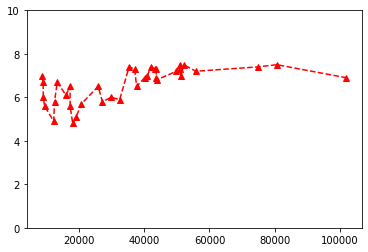

In [37]:
plt.plot(df.GDP, df.LifeSatisfaction, marker="^", color="red", linestyle="dashed")
plt.ylim(0, 10)
plt.show()

<AxesSubplot:xlabel='GDP', ylabel='LifeSatisfaction'>

(0.0, 10.0)

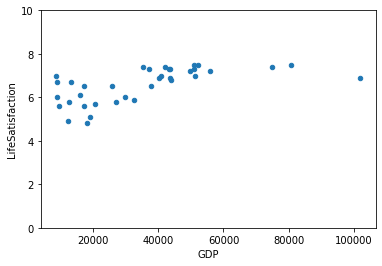

In [40]:
df.plot(kind="scatter", x="GDP", y="LifeSatisfaction")
plt.ylim(0, 10)

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [42]:
model.fit(df[["GDP"]].values, df.LifeSatisfaction)

LinearRegression()

In [44]:
model.predict([[22587]])

array([6.28653618])